# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.136487e+01     8.221210e+00
 * time: 0.002167940139770508
     1     2.823348e+01     4.035712e+00
 * time: 0.008317947387695312
     2     1.835926e+01     3.156581e+00
 * time: 0.015558004379272461
     3     1.246377e+01     2.225779e+00
 * time: 0.022552967071533203
     4     1.047582e+01     1.967883e+00
 * time: 0.028156042098999023
     5     9.673864e+00     1.403829e+00
 * time: 0.03359103202819824
     6     9.180138e+00     8.859083e-01
 * time: 0.0394589900970459
     7     8.848107e+00     7.410893e-01
 * time: 0.04555106163024902
     8     8.582458e+00     5.489999e-01
 * time: 0.05161714553833008
     9     8.440080e+00     4.767707e-01
 * time: 0.05771994590759277
    10     8.395237e+00     4.881238e-01
 * time: 0.06233716011047363
    11     8.338117e+00     4.524586e-01
 * time: 0.06697797775268555
    12     8.273599e+00     4.486037e-01
 * time: 0.07167696952819824
    13     8.252630e+00     7.530260e-01
 * t

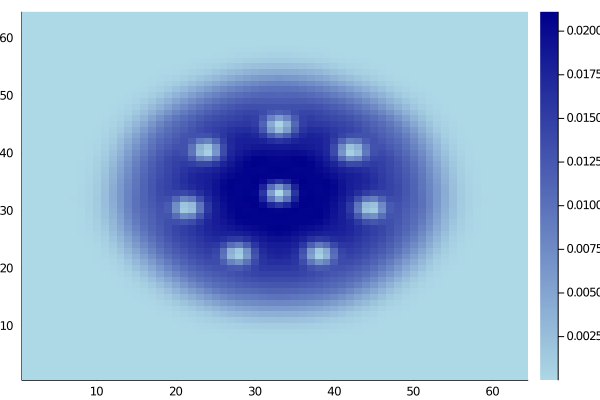

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)